# Sample for the Wigner-Ville distribution

In [2]:
using Winston;

In [3]:
using Color;

In [4]:
include("sampledata.jl")

sampledata

In [5]:
import sampledata

In [6]:
x,y=sampledata.genfm(512,1.0,0.7)

(linspace(0.0,314.1592653589793,512),[1.0,0.513115,-0.405107,-0.944053,-0.953469,-0.719094,-0.473183,-0.276441,-0.0906326,0.152092  …  0.152092,-0.0906326,-0.276441,-0.473183,-0.719094,-0.953469,-0.944053,-0.405107,0.513115,1.0])

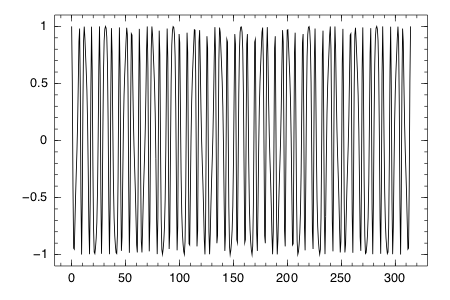

In [7]:
display(plot(x, y))

In [9]:
include("cohenclass.jl")

cohenclass

In [10]:
import cohenclass

In [11]:
import DSP

In [12]:
ya=DSP.Util.hilbert(y);

In [13]:
y=conj(ya')

1x512 Array{Complex{Float64},2}:
 1.0+0.362893im  0.513115+1.04894im  …  0.513115-1.04894im  1.0-0.362893im

In [14]:
tfr=cohenclass.tfrwv(y);

Sizes of x and t
(1,512)
(1,512)
Single Wigner Ville


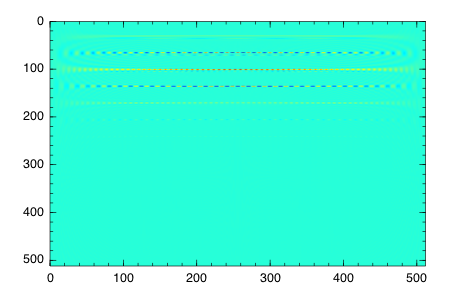

In [15]:
imagesc(tfr)